In [1]:
url = "https://gist.githubusercontent.com/ryanorsinger/6218f5731f3df7cb4771ff3879fdeaa3/raw/88cb6bed276e2236c33df011bd753b6c73832c30/quartet.csv"

In [2]:
# grab our imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

In [3]:
# let's grab down that url and turn it into a dataframe
df = pd.read_csv(url)

In [4]:
# examine the head of the dataframe
df.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       44 non-null     int64  
 1   dataset  44 non-null     object 
 2   x        44 non-null     float64
 3   y        44 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.5+ KB


In [6]:
df = df.drop(columns='id')

In [7]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [8]:
# whats in dataset?
df.dataset.value_counts()
# it appears to be a categorical

I      11
III    11
II     11
IV     11
Name: dataset, dtype: int64

In [9]:
# what do those descriptive metrics mean for each group?
df.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

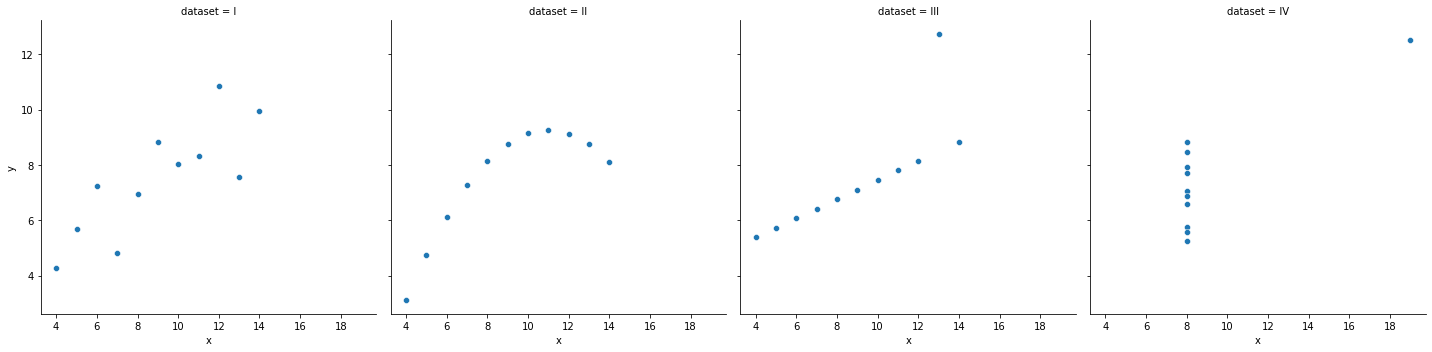

In [10]:
# lets examine this visually:
sns.relplot(x='x', y='y', data=df, col='dataset')

In [11]:
# Ascombe's quartet is a really good reminder that we
# should always be examining data both in descriptive 
# statistical methods as well as with visual methods :)

In [12]:
# let's grab down swiss and utilize our typical
# z score and IQR/Tukey methodologies for outlier 
# detection

In [13]:
df = data('swiss')

In [15]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [19]:
# if we know that these features are all continuous
# and numerical, let's examine our describe
my_describe = df.describe()

In [20]:
my_describe

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


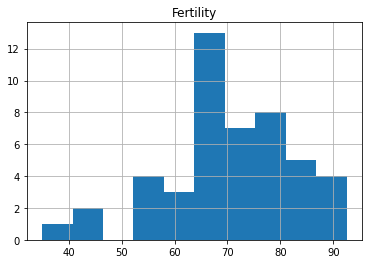

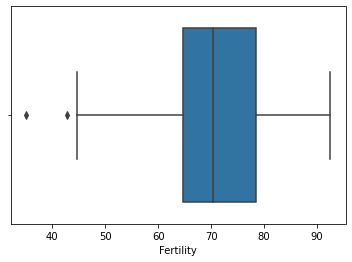

----------


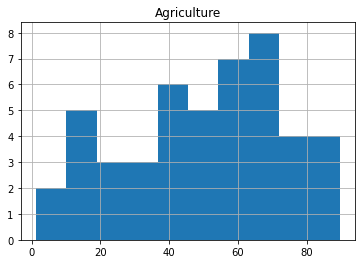

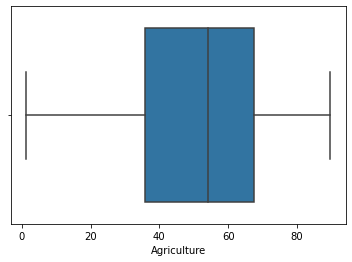

----------


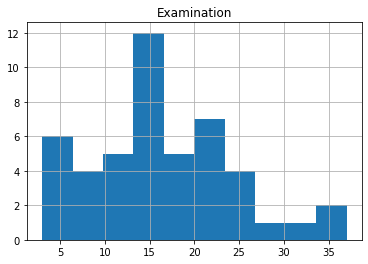

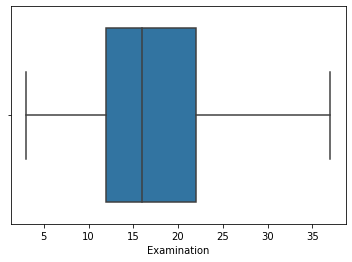

----------


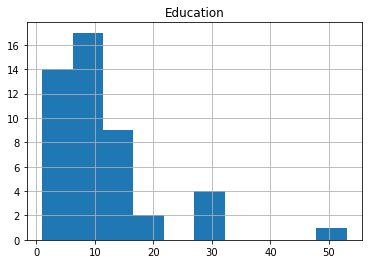

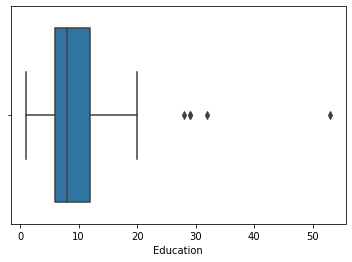

----------


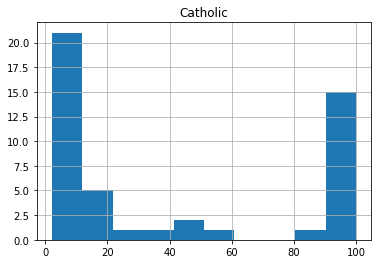

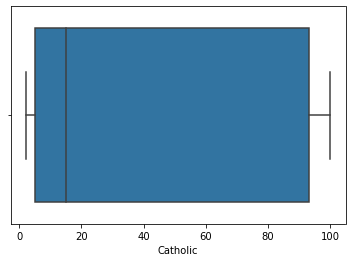

----------


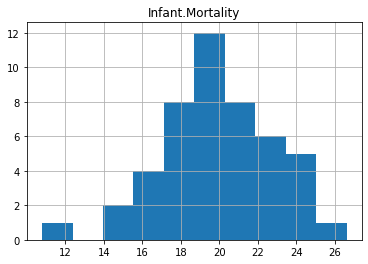

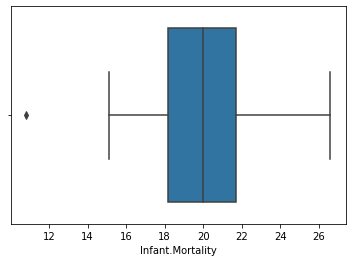

----------


In [21]:
# let's examine some univariate exploration:
for col in df:
    df[col].hist()
    plt.title(col)
    plt.show()
    sns.boxplot(data=df, x=col)
    plt.show()
    print('----------')

In [22]:
# Let's examine this via IQR:
multiplier = 1.5
# let's grab a specific column:
# pick examination first
# IQR: q3 - q1
q1 = df.Examination.quantile(0.25)
q3 = df.Examination.quantile(0.75)
iqr = q3 - q1

In [23]:
q1, q3, iqr, multiplier

(12.0, 22.0, 10.0, 1.5)

In [24]:
# calculate our fences
lower_fence = q1 - (multiplier * iqr)
upper_fence = q3 + (multiplier * iqr)

In [25]:
lower_fence

-3.0

In [26]:
# df where df[col] < lower fence or df[col] > upper fence
df[(df.Examination < lower_fence) | (df.Examination > upper_fence)]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [27]:
# if we wanted to carry over this examination,
# we would want to create a function in order to assess
# the outliers for each column in the dataframe
def iqr_outliers(col, multiplier=1.5):
    # IQR: q3 - q1
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (multiplier * iqr)
    upper_fence = q3 + (multiplier * iqr)
    return df[(df[col] < lower_fence) | (df[col] > upper_fence)]

In [30]:
iqr_outliers('Infant.Mortality', multiplier=3.0)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality


In [33]:
df.to_markdown()

"|              |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |\n|:-------------|------------:|--------------:|--------------:|------------:|-----------:|-------------------:|\n| Courtelary   |        80.2 |          17   |            15 |          12 |       9.96 |               22.2 |\n| Delemont     |        83.1 |          45.1 |             6 |           9 |      84.84 |               22.2 |\n| Franches-Mnt |        92.5 |          39.7 |             5 |           5 |      93.4  |               20.2 |\n| Moutier      |        85.8 |          36.5 |            12 |           7 |      33.77 |               20.3 |\n| Neuveville   |        76.9 |          43.5 |            17 |          15 |       5.16 |               20.6 |\n| Porrentruy   |        76.1 |          35.3 |             9 |           7 |      90.57 |               26.6 |\n| Broye        |        83.8 |          70.2 |            16 |           7 |      92.85 |              

|              |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |
|:-------------|------------:|--------------:|--------------:|------------:|-----------:|-------------------:|
| V. De Geneve |        35   |           1.2 |            37 |          53 |      42.34 |               18   |
| Rive Gauche  |        42.8 |          27.7 |            22 |          29 |      58.33 |               19.3 |
--------
| Fertility   | Agriculture   | Examination   | Education   | Catholic   | Infant.Mortality   |
|-------------|---------------|---------------|-------------|------------|--------------------|
--------
| Fertility   | Agriculture   | Examination   | Education   | Catholic   | Infant.Mortality   |
|-------------|---------------|---------------|-------------|------------|--------------------|
--------
|              |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |
|:-------------|------------:|--------------:|--------------:|------------:|-----------:|-------------------:|
| Lausanne     |        55.7 |          19.4 |            26 |          28 |      12.11 |               20.2 |
| Neuchatel    |        64.4 |          17.6 |            35 |          32 |      16.92 |               23   |
| V. De Geneve |        35   |           1.2 |            37 |          53 |      42.34 |               18   |
| Rive Droite  |        44.7 |          46.6 |            16 |          29 |      50.43 |               18.2 |
| Rive Gauche  |        42.8 |          27.7 |            22 |          29 |      58.33 |               19.3 |
--------
| Fertility   | Agriculture   | Examination   | Education   | Catholic   | Infant.Mortality   |
|-------------|---------------|---------------|-------------|------------|--------------------|
--------
|           |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |
|:----------|------------:|--------------:|--------------:|------------:|-----------:|-------------------:|
| La Vallee |        54.3 |          15.2 |            31 |          20 |       2.15 |               10.8 |

In [31]:
for col in df.columns:
    print
    print(iqr_outliers(col).to_markdown())
    print('--------')

|              |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |
|:-------------|------------:|--------------:|--------------:|------------:|-----------:|-------------------:|
| V. De Geneve |        35   |           1.2 |            37 |          53 |      42.34 |               18   |
| Rive Gauche  |        42.8 |          27.7 |            22 |          29 |      58.33 |               19.3 |
--------
| Fertility   | Agriculture   | Examination   | Education   | Catholic   | Infant.Mortality   |
|-------------|---------------|---------------|-------------|------------|--------------------|
--------
| Fertility   | Agriculture   | Examination   | Education   | Catholic   | Infant.Mortality   |
|-------------|---------------|---------------|-------------|------------|--------------------|
--------
|              |   Fertility |   Agriculture |   Examination |   Education |   Catholic |   Infant.Mortality |
|:-------------|------------:|----

In [37]:
# let's see what the behavior is like for z-score:
# data point  - mean of that feature divided by std of 
# that feature
z_scores_infant_mortality = (
    df['Infant.Mortality'] -
    df['Infant.Mortality'].mean()) / \
df['Infant.Mortality'].std()

In [38]:
z_scores_infant_mortality.head()

Courtelary      0.775037
Delemont        0.775037
Franches-Mnt    0.088388
Moutier         0.122720
Neuveville      0.225718
Name: Infant.Mortality, dtype: float64

In [39]:
# Lets broadcast that into its own column:
df['infant_mortality_zscores'] = \
z_scores_infant_mortality

In [40]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores
Courtelary,80.2,17.0,15,12,9.96,22.2,0.775037
Delemont,83.1,45.1,6,9,84.84,22.2,0.775037
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,0.088388
Moutier,85.8,36.5,12,7,33.77,20.3,0.122720
Neuveville,76.9,43.5,17,15,5.16,20.6,0.225718


In [42]:
df[df['infant_mortality_zscores'].abs() >= 3]

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,infant_mortality_zscores
La Vallee,54.3,15.2,31,20,2.15,10.8,-3.138862


In [ ]:
# consider making another function for z scores,
# examining those for each column,
# and then comparing the results of each to its 
# original data set